<a href="https://colab.research.google.com/github/Tommy-somen/pytorch/blob/master/udemy/pytorch%E3%81%AENN%E6%A7%8B%E7%AF%89%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習
第2講の演習です。  
PyTorchを使ってモデルを構築し、最適化アルゴリズムを設定しましょう。


## データを訓練用とテスト用に分割

In [ ]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
#数字データの取得
digit_data = datasets.load_digits()

In [ ]:
#トレーニング用の画像データを用意
digit_images = digit_data.data
digit_images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

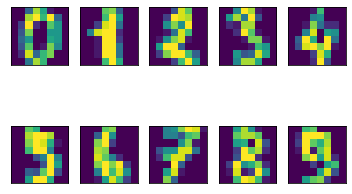

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  ax = plt.subplot(2, 5,i+1)
  image = digit_images[i].reshape(8,8)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(image)
  plt.plot()

In [ ]:
#画像に対する解答データの取得
digit_labels = digit_data.target
digit_labels

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#取得済みの画像情報と、解答データについて分割する
x_train, x_test, y_train, y_test = train_test_split(digit_images, digit_labels)

In [ ]:
#訓練データ並びにテストデータについて、tensor変換を行う

#訓練データ
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

#テストデータ
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
x_train, y_train

(tensor([[ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
         [ 0.,  0., 12.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
         ...,
         [ 0.,  0.,  3.,  ...,  8.,  0.,  0.],
         [ 0.,  3., 15.,  ...,  0.,  0.,  0.],
         [ 0.,  0., 13.,  ...,  0.,  0.,  0.]]),
 tensor([3, 5, 1,  ..., 2, 7, 5]))

In [ ]:
x_test, y_test

(tensor([[ 0.,  0., 10.,  ..., 16., 16., 11.],
         [ 0.,  0.,  0.,  ..., 15., 10.,  0.],
         [ 0.,  0.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  6.,  ...,  0.,  0.,  0.],
         [ 0.,  0., 10.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  2.,  ...,  0.,  0.,  0.]]),
 tensor([1, 6, 7, 6, 6, 3, 5, 6, 9, 0, 3, 7, 7, 2, 1, 2, 1, 2, 8, 9, 4, 6, 6, 0,
         2, 5, 5, 0, 2, 5, 8, 1, 2, 1, 0, 4, 7, 7, 0, 7, 3, 1, 6, 8, 9, 5, 8, 3,
         8, 5, 7, 8, 6, 7, 5, 1, 7, 8, 8, 3, 2, 5, 8, 9, 4, 3, 7, 2, 2, 4, 2, 7,
         4, 3, 5, 9, 8, 4, 9, 0, 9, 3, 2, 0, 3, 8, 9, 6, 5, 7, 6, 5, 0, 8, 7, 8,
         6, 9, 2, 1, 7, 8, 6, 0, 3, 0, 8, 9, 4, 8, 1, 4, 5, 0, 6, 5, 2, 0, 5, 8,
         7, 7, 6, 4, 3, 7, 3, 9, 3, 2, 5, 8, 8, 3, 4, 9, 3, 7, 7, 5, 1, 4, 5, 8,
         3, 0, 2, 2, 5, 5, 2, 1, 9, 4, 0, 9, 2, 5, 5, 6, 3, 4, 9, 4, 5, 9, 6, 3,
         9, 0, 4, 7, 3, 5, 5, 6, 0, 5, 9, 2, 9, 4, 7, 0, 3, 5, 9, 4, 0, 8, 6, 2,
         5, 7, 9, 2, 2, 1, 6, 5, 8, 5, 6, 0, 3, 6, 1, 

## モデルの構築
`nn`モジュールの`Sequential`クラスを使い、`print(net)`で以下のように表示されるモデルを構築しましょう。
```
Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
```

In [ ]:
#NN用のライブラリ
from torch import nn

In [ ]:
#NN用のライブラリ
from torch import nn

model = nn.Sequential(
    #入力は8*8の64のため、64とし、出力層で32
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


## 学習
モデルを訓練します。  
最適化アルゴリズムの設定をしましょう。  
最適化アルゴリズムは、以下のページから好きなものを選択してください。  
https://pytorch.org/docs/stable/optim.html




In [ ]:
from torch import optim

In [ ]:
#誤差関数
loss = nn.CrossEntropyLoss()

In [ ]:
#最適化アルゴリズム -> Ada,
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#学習を実施する ->エポックは1000に設定
def train(model, loss, optimizer, epoch, x_train, x_test, y_train, y_test):
  
  #損失状況に関するログの作成
  rec_loss_train = []
  rec_loss_test = []

  for i in range(epoch):

    #勾配を0に設定
    optimizer.zero_grad()

    #順伝播する
    pred_train = model(x_train) #学習モデルの予測値y^
    pred_test = model(x_test) #学習後モデルによるテストデータの予測値y^

    #学習後の誤差を求める -> y^とyの誤差を求める
    loss_train = loss(pred_train, y_train) 
    loss_test = loss(pred_test, y_test)
    rec_loss_train.append(loss_train.item())
    rec_loss_test.append(loss_test.item())

    #逆伝播を求める
    loss_train.backward()

    #最適化関数の更新
    optimizer.step()

    if i%10 == 0:
      print("Epoch", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

  return rec_loss_train, rec_loss_test

In [ ]:
#学習の実行
rec_train, rec_test = train(model, loss, optimizer,1000, x_train, x_test, y_train, y_test)

Epoch 0 Loss_Train: 2.4991941452026367 Loss_Test: 2.4926483631134033
Epoch 10 Loss_Train: 2.1429617404937744 Loss_Test: 2.1379642486572266
Epoch 20 Loss_Train: 1.892822265625 Loss_Test: 1.8835245370864868
Epoch 30 Loss_Train: 1.6084243059158325 Loss_Test: 1.5976598262786865
Epoch 40 Loss_Train: 1.2824733257293701 Loss_Test: 1.2662469148635864
Epoch 50 Loss_Train: 0.963320791721344 Loss_Test: 0.953738808631897
Epoch 60 Loss_Train: 0.7026974558830261 Loss_Test: 0.7015042304992676
Epoch 70 Loss_Train: 0.5079938769340515 Loss_Test: 0.5298100709915161
Epoch 80 Loss_Train: 0.3560654819011688 Loss_Test: 0.3966578245162964
Epoch 90 Loss_Train: 0.24347081780433655 Loss_Test: 0.2952701449394226
Epoch 100 Loss_Train: 0.18367882072925568 Loss_Test: 0.24148063361644745
Epoch 110 Loss_Train: 0.14836513996124268 Loss_Test: 0.21094349026679993
Epoch 120 Loss_Train: 0.12398948520421982 Loss_Test: 0.19035710394382477
Epoch 130 Loss_Train: 0.10616131871938705 Loss_Test: 0.17681723833084106
Epoch 140 Loss

## 誤差の推移

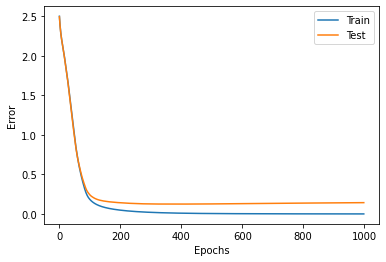

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(rec_train)), rec_train, label="Train")
plt.plot(range(len(rec_test)), rec_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 正解率

In [ ]:
y_test = model(x_test)
count = (y_test.argmax(1) == y_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

RuntimeError: ignored

# 解答例
以下は、どうしても手がかりがないときのみ参考にしましょう。

In [ ]:
from torch import nn

net = nn.Sequential(
    # ------- ここからコードを記述 -------
    nn.Linear(64, 128),  # 全結合層
    nn.ReLU(),          # ReLU
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    # ------- ここまで -------
)
print(net)

In [ ]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())  # ここにコードを記述

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):

    # 勾配を0に
    optimizer.zero_grad()
    
    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)
    
    # 誤差を求める
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播（勾配を求める）
    loss_train.backward()
    
    # パラメータの更新
    optimizer.step()

    if i%100 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())